# Ayudantía 4: integración numérica, método del trapecio y método de Simpson


## Mini repasito

### Idea general: sumas de Riemann
<img src=imagenes/riemann.png>



La integración, en términos generales, vendría siendo el límite $h= \Delta x \rightarrow 0$ de una suma de Riemann
\begin{align*}
I = \int_a^{b} f(x)dx = \sum_{i=o}^{N}hf(x)
\end{align*}

Suma por el punto izquierdo: se elige i = 0, 1, ..., n-1 para la aproximación $f(a+\Delta x)$.

Suma por el punto derecho: se elige i = 1, 2, ..., n para la aproximación $f(a+\Delta x)$.

### Ejemplo suma de Riemann por izquierda

Aproximación de la integral usando sumas de Riemann (vértices izquierdos): 1.9835


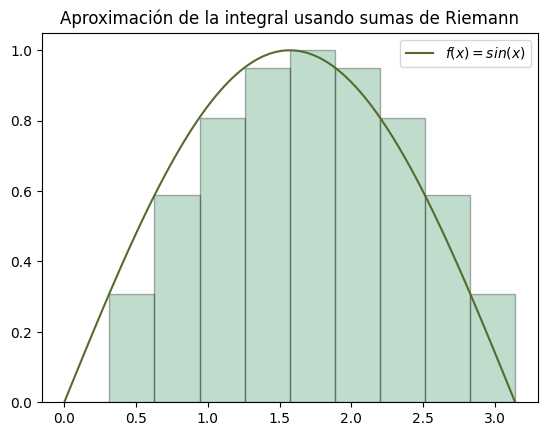

In [145]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

a = 0           #inicio
b = np.pi       #final
n = 10           #numero de elementos
c = (b-a)/n     #ancho del intervalo
x = np.linspace(a,b,100)

l_values = np.array([a + i * c for i in range(n)])

I_l = c * np.sum(f(l_values))
print(f"Aproximación de la integral usando sumas de Riemann (vértices izquierdos): {I_l:.4f}")

for l_val in l_values:
    plt.bar(l_val, f(l_val), width=c, alpha=0.3, align='edge', color='seagreen', edgecolor='black')

plt.plot(x, f(x), label=r'$f(x) = sin(x)$', color='darkolivegreen')
plt.title('Aproximación de la integral usando sumas de Riemann')
plt.legend()
plt.show()


### Ejemplo suma de Riemann por derecha

Aproximación de la integral usando sumas de Riemann (vértices derechos): 1.9835


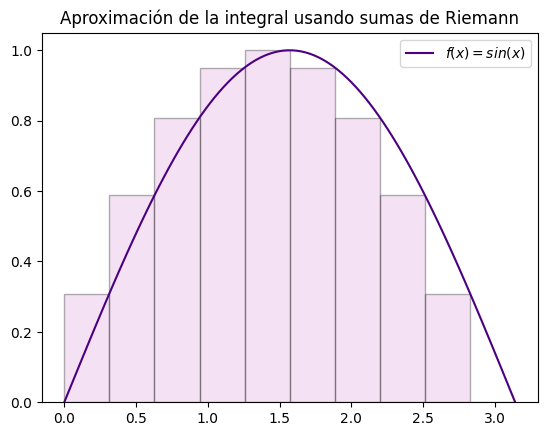

In [146]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

a = 0           #inicio
b = np.pi       #final
n = 10           #numero de elementos
c = (b-a)/n     #ancho del intervalo

r_values = np.array([a + (i+1) * c for i in range(n)])

I_r = c * np.sum(f(r_values))
print(f"Aproximación de la integral usando sumas de Riemann (vértices derechos): {I_l:.4f}")

for r_val in r_values:
    plt.bar(r_val, f(r_val), width=-c, alpha=0.3, align='edge', color='plum', edgecolor='black')

plt.plot(x, f(x), label=r'$f(x) = sin(x)$', color='indigo')
plt.title('Aproximación de la integral usando sumas de Riemann')
plt.legend()
plt.show()

# Regla trapezoidal

<img src=imagenes/trapecio.png>

Más precisa que la regla del rectángulo o la del punto medio, pues se ajusta mejor a las curvas. Su método consiste en aproximar el área bajo la curva al área de un conjunto de trapecios de ancho $h$ que se ajusten a ella.

El área de un trapecio viene dada por

\begin{align*}
\text{Area} = \frac{A + B}{2}\cdot h
\end{align*}

en donde consideraremos $A$ y $B$ como las aristas y $h$ como el ancho de los trapecios. De este modo, para un intervalo $[a,b]$, tomamos los nodos $A = f(x_{k-1})$ y $B= f(x_k)$, así el área de un trapecio será

\begin{align*}
\int_{x_k-1}^{x_k} f(x)dx \approx A_k &= \frac{h}{2}[f(x_{k-1}) + f(x_k)] \\
\end{align*}

donde $h = \frac{b-a}{N}$, siendo $N$ el número de subintervalos. Notamos que podemos escribir estos términos de la forma $x_{k-1} = a + (k-1)h$ y $x_k = a + kh$, de este modo la regla del trapecio es 

\begin{align*}
\int_{x_k-1}^{x_k} f(x)dx \approx \frac{h}{2}[f(a + (k-1)h) + f(a + kh)]
\end{align*}

Mediante esta lógica, para abarcar todo el intervalo $[a,b]$ se aplica la suma sobre k desde 1 hasta $N$:

\begin{align*}
I \approx \sum_{k=1}^{N} A_k &= \frac{h}{2}\sum_{k=1}^{N}\left[\,f(a+(k-1)h) + f(a+kh)\,\right] \\
&= h\left[\frac{1}{2}f(a) + f(a+h) + f(a+2h) + ... + \frac{1}{2}f(b)\right] \\
&= h\left[\frac{1}{2}f(a) + \frac{1}{2}f(b) + \sum_{k=1}^{N} f(a+kh) \right]
\end{align*}

esta es la fórmula extendida de la regla trapezoidal que nos permitirá calcular, mediante varios trapecios, el área de una curva en cierto intervalo $[a,b]$.

### Ejercicio 1: Utilizando la regla trapezoidal, escriba un programa que calcule la integral $\int_0^2 x^4 - 2x + 1\, dx$, considerando $N = 10$.

Aproximación de la integral usando regla trapezoidal: 4.50656


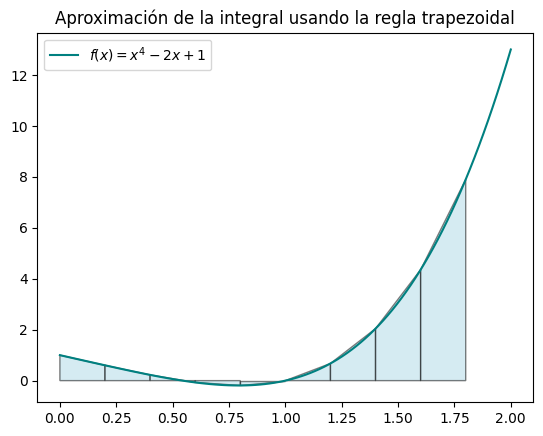

In [147]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**4 - 2*x + 1)

a = 0.0           #inicio
b = 2.0           #final
N = 10         #numero de subintervalos
h = (b-a)/N     #ancho del intervalo
s = 0.5*f(a)+0.5*f(b)

for k in range(1,N):
    s += f(a+k*h)
    
I_t = h*s    
    
print(f"Aproximación de la integral usando regla trapezoidal: {I_t:.5f}")

################## GRAFICO ###########################

for k in range(1,N):
    x_vert = [a + k*h, a + (k-1)*h , a + (k-1)*h, a + k*h]
    y_vert = [0, 0, f(a + (k-1)*h), f(a + k*h)]
    plt.fill(x_vert, y_vert, 'lightblue', edgecolor='black', alpha=0.5)
    
x = np.linspace(a,b,100)


plt.plot(x, f(x), color='teal', label=r'$f(x) = x^4 -2x +1$')
plt.title('Aproximación de la integral usando la regla trapezoidal')
plt.legend()
plt.show()

# Regla de Simpson

<img src=imagenes/simpson1.png>

Esta regla es aún más precisa que las anteriores pues imita la curva ya no mediante una línea recta sino que utilizando curvas cuadráticas (esto puede ser muy útil sobretodo para funciones que varíen rapidamente). Por ende se requerirán 3 puntos (adyacentes) para definirla.

Supongamos divisiones equidistantes de ancho $h$ para una función f(x). Tomamos los puntos adyacentes $x_0 = -h$, $x_1=0$ y $x_2=+h$, así su forma cuadrática ($Ax^{2} + Bx + C$) será

\begin{align*}
&f(-h) = Ah^{2} - Bh + C,  &f(0) = C&,  &f(h) = Ah^{2} + Bh + C
\end{align*}

despejamos las constantes

\begin{align*}
&A = \frac{1}{h^{2}}\left[\frac{1}{2}f(x_0)-f(x_1)+\frac{1}{2}f(x_2)\right]\;;&   &B = \frac{1}{2h}[f(x_2) - f(x_0)]\;;& &C = f(x_1)
\end{align*}

así, el área bajo la curva $[x_0,x_2]$ será

\begin{align*}
\int_{x_0}^{x_2} Ax^{2} + Bx + C dx = \frac{2}{3}Ah^{3} + 2Ch = \frac{h}{3}[f(x_0) + 4f(x_1) + f(x_2)]
\end{align*} 

esta es la llamada regla de Simpson.

### Regla de simpson generalizada

Generalizamos este método para un intervalo $[a,b]$ para una función $f(x)$, la integral entonces sería

\begin{align*}
\int_a^{b} f(x) dx &\approx \frac{h}{3}[( f(a) + 4f(a+h) + f(a+2h) ) + ( f(a+2h) + 4f(a+3h) + f(a+4h) ) + ... + ( f(a+(N-2)h) + 4f(a+(N-1)h) + f(b) )]\\
&= \frac{h}{3} [ f(a) + 4f(a+h) + 2f(a+2h) + 4f(a+3h) + 2f(a+4h) + ... + 2f(a+(N-2)h) + 4f(a+(N-1)h) + f(b)] \\
&= \frac{h}{3} \left[ f(a) + f(b) + 4\sum_{\text{k impar}}^{N-1} f(a+kh) + 2\sum_{\text{k par}}^{N-2} f(a+kh) \right] \\
\end{align*}

esta es la llamada regla de Simpson generalizada o versión extendida de la regla de Simpson, la cual nos ayudará a estimar mejor las integrales.

### Ejercicio 2: Utilizando la regla se Simpson, escriba un programa que calcule la integral $\int_0^2 x^4 - 2x + 1\, dx$, considerando $N = 10$.

In [151]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**4 - 2*x + 1)

a = 0.0           #inicio
b = 2.0           #final
N = 10         #numero de subintervalos
h = (b-a)/N     #ancho del intervalo
s = f(a) + f(b)
k_impar = 0
k_par = 0

for k in range(1,N,2):   #suma de impares
    k_impar += f(a + k*h)

for k in range(2,N,2):   #suma de pares
    k_par += f(a + k*h)
    

I_s = (h/3)*(s + 4*k_impar + 2*k_par)    
    
print(f"Aproximación de la integral usando regla de Simpson: {I_s:.5f}")


Aproximación de la integral usando regla de Simpson: 4.40043


##### Nota: compare ambos métodos variando $N$ para que vea efectivamente cuál es más preciso

### Ejercicio 3: Considere la función $E(x) = \int_{0}^{x} e^{-t^{2}} dt$.
* Escriba un programa que calcule $E(x)$ para valores de $x$ desde 0 hasta 3 en pasos de 0.1. Escoja el método y el número de subintervalos que estime convenientes.
* Compare su resultado con la integral analítica de la función.
* Grafique $E(x)$ en función de $x$.

La integral aproximada por método del trapecio es: 0.88620


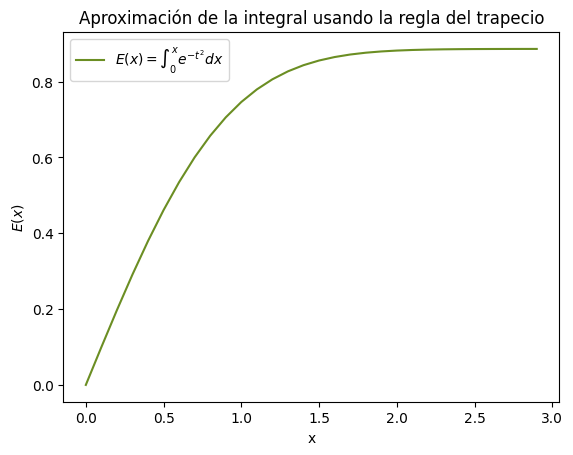

In [169]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t**2)
 

def trapezoid_rule(f, a, b, N):
    h = (b - a) / N 
    t = np.linspace(a, b, N+1)  
    y = f(t) 
    S = np.sum(y[1:N])
    Int_t = h*(0.5*f(a) + 0.5*f(b) + S)
    return Int_t
     
result = trapezoid_rule(f, 0, 3, 10)
print(f"La integral aproximada por método del trapecio es: {result:.5f}")

x_val = np.arange(0,3,0.1)
E = []

for x in x_val:
    Ex = trapezoid_rule(f, 0, x, 10)
    E.append(Ex)


plt.plot(x_val, E, color='olivedrab', label=r'$E(x) = \int_0^{x}e^{-t^{2}}dx$')
plt.title('Aproximación de la integral usando la regla del trapecio')
plt.xlabel('x')
plt.ylabel('$E(x)$')
plt.legend()
plt.show()

La integral aproximada por método de Simpson es: 0.88621


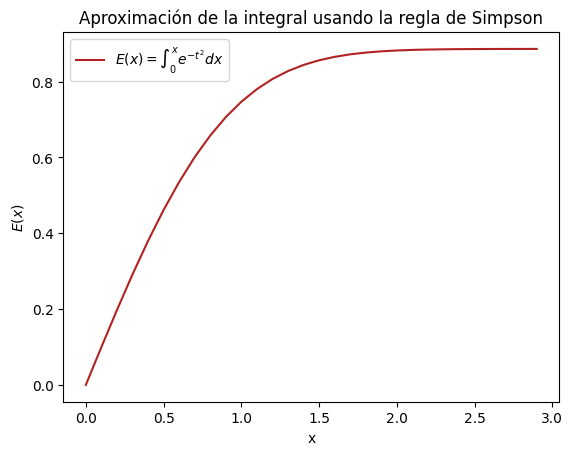

In [180]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t**2)
     
def simpson_rule(f, a, b , N):
    h = (b - a) / N 
    t = np.linspace(a, b, N+1)  
    y = f(t) 
    S = 0
    S += 4*np.sum(y[1:N:2]) + 2*np.sum(y[2:N-1:2])
    Int_s = (h/3)*(f(a) + f(b) + S)
    return Int_s
     
result = simpson_rule(f, 0, 3, 10)
print(f"La integral aproximada por método de Simpson es: {result:.5f}")

x_val_s = np.arange(0,3,0.1)
E_s = []

for x in x_val_s:
    Ex = simpson_rule(f, 0, x, 10)
    E_s.append(Ex)


plt.plot(x_val_s, E_s, color='firebrick', label=r'$E(x) = \int_0^{x}e^{-t^{2}}dx$')
plt.title('Aproximación de la integral usando la regla de Simpson')
plt.xlabel('x')
plt.ylabel('$E(x)$')
plt.legend()
plt.show()